In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from adjustText import adjust_text
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df['job_country'] == 'United States'].copy().dropna(subset = 'salary_year_avg')
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [4]:
job_list = df['job_title_short'].value_counts().index[:6].tolist()
job_list

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer',
 'Senior Data Engineer']

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_list)].copy()
df_US_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [6]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).index
job_order



Index(['Senior Data Engineer', 'Data Scientist', 'Software Engineer',
       'Data Engineer', 'Business Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

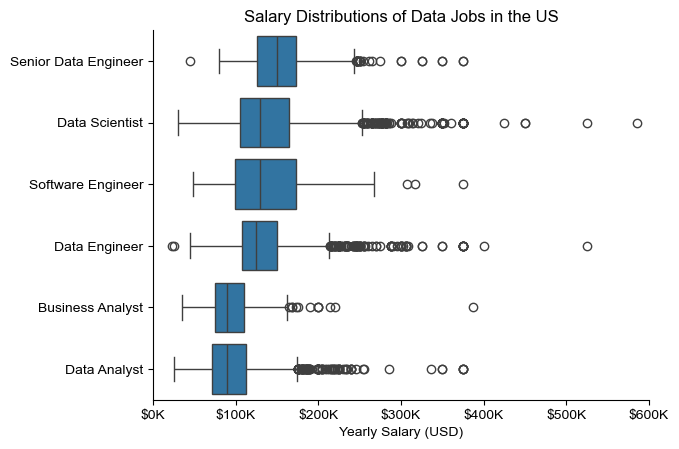

In [7]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [8]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset = 'salary_year_avg')

In [9]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['job_skills', 'salary_year_avg']].head(5)

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0


In [10]:
df_DA_US_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)
df_DA_US_top_pay = df_DA_US_top_pay.head(10)
df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [11]:
df_DA_US_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_US_top_skills = df_DA_US_top_skills.head(10).sort_values(by = 'median', ascending = False)
df_DA_US_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


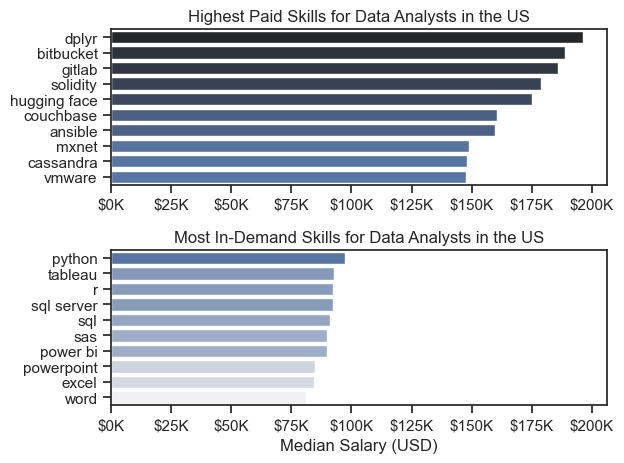

In [12]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_US_top_skills, x='median', y=df_DA_US_top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()


In [35]:
import plotly.express as px
import pandas as pd
import seaborn as sns

# **Top 10 Highest Paid Skills for Data Analysts**
fig1 = px.bar(df_DA_US_top_pay, 
              x='median',   # Corrected column name
              y=df_DA_US_top_pay.index, 
              orientation='h',
              text_auto='.2s',
              title='Highest Paid Skills for Data Analysts in the US')

fig1.update_traces(marker_color='lightblue', textposition='outside')
fig1.update_layout(xaxis_tickformat='$,.0f')

# **Top 10 Most In-Demand Skills for Data Analysts**
fig2 = px.bar(df_DA_US_top_skills, 
              x='median',  # Corrected column name
              y=df_DA_US_top_skills.index, 
              orientation='h',
              text_auto=True,
              title='Most In-Demand Skills for Data Analysts in the US')

fig2.update_traces(marker_color='gray', textposition='outside')
fig2.update_layout(xaxis_tickformat=',d')


# Show interactive figures
fig1.show()
fig2.show()


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Sample Data (Replace with actual data)
df_DA_US_top_pay = pd.DataFrame({
    'Skill': ['SQL', 'Python', 'Tableau', 'Power BI', 'Excel'],
    'Median Salary': [95000, 90000, 85000, 82000, 80000]
})

df_DA_US_top_skills = pd.DataFrame({
    'Skill': ['SQL', 'Python', 'Excel', 'Power BI', 'Tableau'],
    'Demand': [1500, 1400, 1300, 1200, 1100]
})

# Sorting for better visualization
df_DA_US_top_pay = df_DA_US_top_pay.sort_values(by="Median Salary", ascending=False)
df_DA_US_top_skills = df_DA_US_top_skills.sort_values(by="Demand", ascending=False)

# Initialize the Figure
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Set the styles
sns.set_theme(style="whitegrid")

def update(frame):
    """ Update function for animation """
    ax[0].cla()  # Clear the first plot
    ax[1].cla()  # Clear the second plot

    # Simulating changing values over time (ensuring non-negative values)
    df_DA_US_top_pay["Median Salary"] = np.maximum(
        df_DA_US_top_pay["Median Salary"] + np.random.randint(-2000, 2000, size=len(df_DA_US_top_pay)), 
        50000
    )
    df_DA_US_top_skills["Demand"] = np.maximum(
        df_DA_US_top_skills["Demand"] + np.random.randint(-100, 100, size=len(df_DA_US_top_skills)), 
        1000
    )

    # Plot 1: Highest Paid Skills
    sns.barplot(data=df_DA_US_top_pay, x="Median Salary", y="Skill", ax=ax[0], palette="dark:b_r")
    ax[0].set_title(f"Highest Paid Skills for Data Analysts (Frame {frame})")
    ax[0].set_xlabel("")
    ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

    # Plot 2: Most In-Demand Skills
    sns.barplot(data=df_DA_US_top_skills, x="Demand", y="Skill", ax=ax[1], palette="light:b")
    ax[1].set_title(f"Most In-Demand Skills for Data Analysts (Frame {frame})")
    ax[1].set_xlabel("Demand Count")
    ax[1].set_xlim(1000, 2000)  # Fixed range for better visualization

    plt.tight_layout()

# Creating the animation
ani = FuncAnimation(fig, update, frames=20, interval=1000, repeat=True)

# Ensure the animation object is not deleted before rendering
plt.show()


c:\Users\Nora\anaconda3\envs\python_course\Lib\site-packages\matplotlib\animation.py:908: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



In [44]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [45]:
matplotlib.use('TkAgg')

In [46]:
import matplotlib
print(matplotlib.get_backend())

TkAgg
